## https://scikit-learn.org/stable/user_guide.html

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Advertising.csv")

# Veri Keşfi

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
# Unnamed: 0 sütununu istemiyoruz. DÜşürelim
# df.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.drop('Unnamed: 0', axis=1, inplace=True)

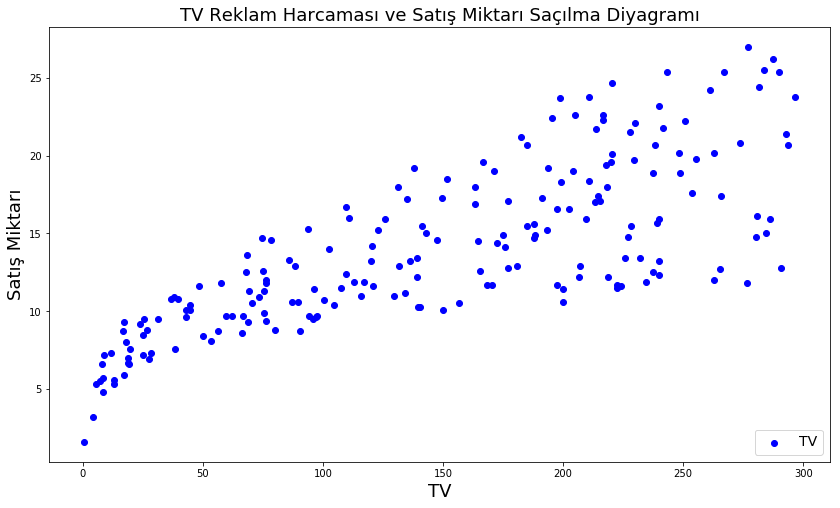

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,8))
plt.scatter(df['TV'], df['Sales'], color='blue', label="TV")

plt.legend(loc='lower right', fontsize=14)
plt.title("TV Reklam Harcaması ve Satış Miktarı Saçılma Diyagramı", fontsize=18)
plt.xlabel("TV", fontsize=18)
plt.ylabel("Satış Miktarı", fontsize=18)
plt.show()

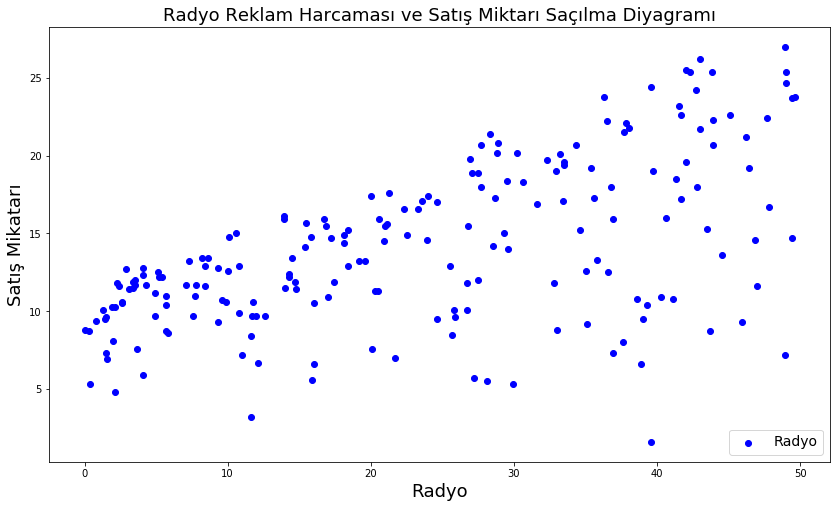

In [9]:
plt.figure(figsize=(14,8))
plt.scatter(df['Radio'], df['Sales'], color='blue', label="Radyo")

plt.legend(loc='lower right', fontsize=14)
plt.title("Radyo Reklam Harcaması ve Satış Miktarı Saçılma Diyagramı", fontsize=18)
plt.xlabel("Radyo", fontsize=18)
plt.ylabel("Satış Mikatarı", fontsize=18)
plt.show()

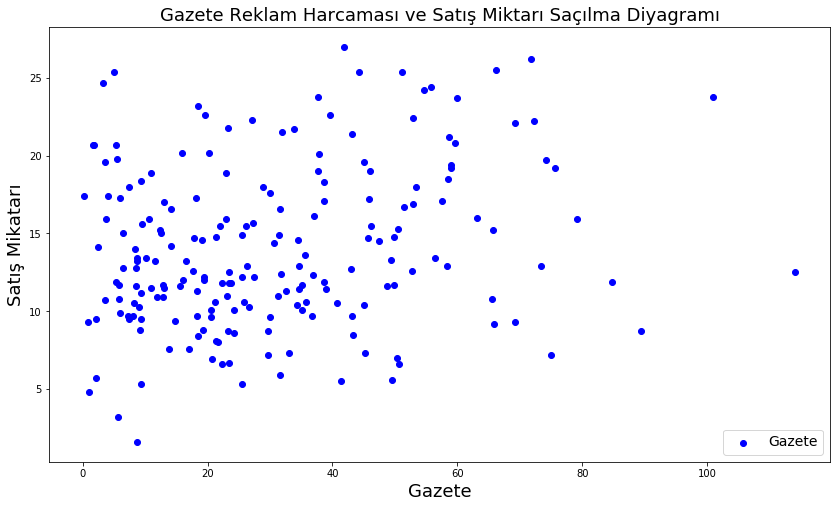

In [10]:
plt.figure(figsize=(14,8))
plt.scatter(df['Newspaper'], df['Sales'], color='blue', label="Gazete")

plt.legend(loc='lower right', fontsize=14)
plt.title("Gazete Reklam Harcaması ve Satış Miktarı Saçılma Diyagramı", fontsize=18)
plt.xlabel("Gazete", fontsize=18)
plt.ylabel("Satış Mikatarı", fontsize=18)
plt.show()

# Veri setini X ve y olarak ayırma (Dikey bölme)

In [11]:
X = df.iloc[:,:-1].values
X.shape

(200, 3)

In [12]:
y = df.iloc[:,-1].values
y.shape

(200,)

# Veri setini train-test olarak ayırma (yatay bölme)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
            test_size=0.25, random_state = 142)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


# Lineer Regresyon Nesnesi Oluşturma (Boş model yaratma)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
regressor = LinearRegression()

# Lineer modeli eğitme (modeli şekillendirme - veriye uydurma - eğitme)

In [17]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Eğitilmiş modelle (makine) test seti kullanarak tahmin 

In [18]:
y_pred = regressor.predict(X_test)

## Tahmin sonuçlarını numpy.ndarray'den dataframe yapma (İncelemek daha Kolay)

In [19]:
predictions = pd.DataFrame(data=y_pred,    # values
                index=range(len(y_pred)),    # 1st column as index
                   columns=['y_pred'])  # 1st row as the column names

# Sadece y_pred'den oluşan df'e test(gerçek) y_test'i sütun olarak ekleme
predictions['y_test'] = y_test
predictions.head()

,y_pred,y_test
0,15.694522,12.0
1,11.163942,8.0
2,10.748508,6.6
3,18.404545,19.0
4,24.936938,27.0


# Regression metrics

## explained_variance

In [20]:
# The sklearn.metrics module implements several loss, score, and utility functions to measure 
# regression performance. Some of those have been enhanced to handle the multioutput case: 
# mean_squared_error, mean_absolute_error, explained_variance_score and r2_score.

In [21]:
from sklearn.metrics import explained_variance_score

In [22]:
explained_variance_score(y_true=y_test, y_pred=y_pred)

0.8483882042522657

## mean_absolute_error

In [23]:
from sklearn.metrics import mean_absolute_error

In [24]:
mean_absolute_error(y_true=y_test, y_pred=y_pred)

1.404364301979611

## r2_score 

In [25]:
from sklearn.metrics import r2_score

In [26]:
r2_score(y_test, y_pred)

0.8321523601270101

# =========    Elle yapılan hesaplamalar     ===========

# Prediction errors

In [27]:
# Tahmin değerleri ile gerçek değerler arasındaki mesafesinin mutlak değeri
predictions['pred_error'] = abs(predictions.y_test - predictions.y_pred)
predictions.head()

,y_pred,y_test,pred_error
0,15.694522,12.0,3.694522
1,11.163942,8.0,3.163942
2,10.748508,6.6,4.148508
3,18.404545,19.0,0.595455
4,24.936938,27.0,2.063062


# Ortalamaya karşı hatalar

In [28]:
# Gerçek değerler ile ortalama arasındaki mesafesinin mutlak değeri
import math
predictions['mean_error'] = abs(predictions['y_test'] - predictions['y_test'].mean())
predictions.head()

,y_pred,y_test,pred_error,mean_error
0,15.694522,12.0,3.694522,2.426
1,11.163942,8.0,3.163942,6.426
2,10.748508,6.6,4.148508,7.826
3,18.404545,19.0,0.595455,4.574
4,24.936938,27.0,2.063062,12.574


## Hataların Karesini Almak

In [29]:
predictions["pred_error_square"] = predictions['pred_error'] ** 2
predictions["mean_error_square"] = predictions['mean_error'] ** 2
predictions.head()

,y_pred,y_test,pred_error,mean_error,pred_error_square,mean_error_square
0,15.694522,12.0,3.694522,2.426,13.649491,5.885476
1,11.163942,8.0,3.163942,6.426,10.010528,41.293476
2,10.748508,6.6,4.148508,7.826,17.210116,61.246276
3,18.404545,19.0,0.595455,4.574,0.354566,20.921476
4,24.936938,27.0,2.063062,12.574,4.256225,158.105476


# rmse elle hesaplama

In [30]:
from math import sqrt
rmse = sqrt(sum(predictions['pred_error_square']) / len(predictions['pred_error_square']))
rmse

2.055965726145453

## r2_score el ile hesaplama

In [31]:
variace_mean_error = sum(predictions['mean_error_square']) / len(predictions['mean_error_square'])
variance_pred_error = sum(predictions['pred_error_square']) / len(predictions['pred_error_square'])

r_2 = 1- (variance_pred_error/variace_mean_error)
r_2

0.83215236012701

# explained variance

In [32]:
import statistics
# explained_variance(y, y^) = 1 - (Var(y-y^) / Var(y))
variance_y_test = statistics.variance(predictions['y_test'])
variance_y_y_pred = statistics.variance((predictions['y_test'] / predictions['y_pred']))
expln_var = 1 - (variance_pred_error/ variance_y_test)
expln_var

0.8355093129244698

# ========= Grafik ===========

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# Eğitim verisi üzerinde yapılan tahminler
y_train_pred = regressor.predict(X_train)

## Eğitim Verileri ile

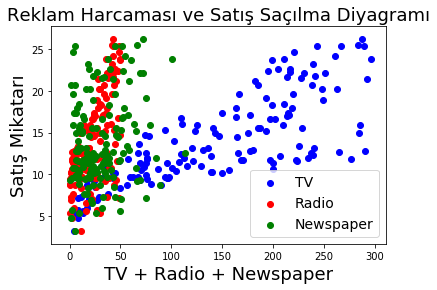

In [35]:
plt.figure(figsize=(6,4))
plt.scatter(X_train[:,0], y_train, color='blue', label="TV")
# plt.plot(X_train[:,0], y_train, color='blue', label="TV")

plt.scatter(X_train[:,1], y_train, color='red', label="Radio")
# plt.plot(X_train[:,1], y_train, color='red', label="Radio")

plt.scatter(X_train[:,2], y_train, color='green', label="Newspaper")
#plt.plot(X_train[:,2], y_train, color='green', label="Newspaper")

plt.legend(loc='lower right', fontsize=14)
plt.title("Reklam Harcaması ve Satış Saçılma Diyagramı", fontsize=18)
plt.xlabel("TV + Radio + Newspaper", fontsize=18)
plt.ylabel("Satış Mikatarı", fontsize=18)
plt.show()

# Sabit ekleme

In [36]:
X.shape

(200, 3)

In [37]:
X = np.append(arr = np.ones((200,1)).astype(int), values = X, axis = 1)
X.shape

(200, 4)

In [ ]:
regressor.

In [109]:
import statsmodels.formula.api as sm
X_opt = X
regressor_OLS = sm.OLS(endog=y, exog=X_opt).fit()

In [110]:
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 28 Mar 2019   Prob (F-statistic):           1.58e-96
Time:                        19:53:44   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
x1             0.0458      0.001     32.809      0.000       0.043       0.049
x2             0.1885      0.009     21.893      0.000       0.172       0.206
x3            -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
#Her seferinde en yüksek p değerine sahip olanı silip hepsi p <= 0.05 olana kadar devam